<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-rzunick/blob/main/Semana_4_Actividad_1_Practica_PCA_Ronald_Zuniga_A01686240.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Semana 4 - Actividad 1: Práctica PCA**

Curso: Ciencia y analítica de datos (Gpo 10) - TC4029.10

Nombre: Ronald Zuniga

Matrícula: A01686240

# Parte 1: Ejercicio Guiado

## **Información de la Base de Datos**

**Información de los atributos**

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; 
** X7 = the repayment status in August, 2005; . . .;
** X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
* X12-X17: Amount of bill statement (NT dollar). 
** X12 = amount of bill statement in September, 2005; 
** X13 = amount of bill statement in August, 2005; . . .; 
** X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment (NT dollar). 
** X18 = amount paid in September, 2005; 
** X19 = amount paid in August, 2005; . . .;
** X23 = amount paid in April, 2005. 


## **Desarrollo del Ejercicio**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [13]:
# Importar Base de Datos
url = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

In [14]:
df = pd.read_csv(url)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [15]:
# Análisis de Base de Datos
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [17]:
# Limpieza de Base de Datos
df.dropna(axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29958 non-null  int64  
 1   X1      29958 non-null  int64  
 2   X2      29958 non-null  float64
 3   X3      29958 non-null  float64
 4   X4      29958 non-null  float64
 5   X5      29958 non-null  float64
 6   X6      29958 non-null  float64
 7   X7      29958 non-null  float64
 8   X8      29958 non-null  float64
 9   X9      29958 non-null  float64
 10  X10     29958 non-null  float64
 11  X11     29958 non-null  float64
 12  X12     29958 non-null  float64
 13  X13     29958 non-null  float64
 14  X14     29958 non-null  float64
 15  X15     29958 non-null  float64
 16  X16     29958 non-null  float64
 17  X17     29958 non-null  float64
 18  X18     29958 non-null  float64
 19  X19     29958 non-null  float64
 20  X20     29958 non-null  float64
 21  X21     29958 non-null  float64
 22

In [18]:
df.shape

(29958, 25)

In [19]:
df.corr()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,1.000000,0.026230,0.019466,0.038794,-0.028700,0.019104,-0.030036,-0.010967,-0.018695,-0.003163,...,0.040379,0.016807,0.016773,0.009673,0.008374,0.039068,0.007752,0.000616,0.002889,-0.013991
X1,0.026230,1.000000,0.024212,-0.219120,-0.107801,0.144515,-0.271201,-0.296206,-0.286245,-0.267371,...,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567,-0.153781
X2,0.019466,0.024212,1.000000,0.014701,-0.031478,-0.091259,-0.057637,-0.070690,-0.065648,-0.059586,...,-0.021854,-0.017056,-0.016733,-0.000297,-0.001517,-0.008630,-0.002369,-0.001775,-0.002911,-0.039730
X3,0.038794,-0.219120,0.014701,1.000000,-0.143431,0.175079,0.105636,0.121632,0.114012,0.108640,...,-0.000566,-0.007625,-0.009192,-0.037385,-0.030007,-0.039953,-0.038263,-0.040276,-0.037189,0.028109
X4,-0.028700,-0.107801,-0.031478,-0.143431,1.000000,-0.413926,0.019747,0.024052,0.032430,0.032826,...,-0.023292,-0.025371,-0.021206,-0.005705,-0.008016,-0.003399,-0.012516,-0.001052,-0.006571,-0.024544
X5,0.019104,0.144515,-0.091259,0.175079,-0.413926,1.000000,-0.039432,-0.050154,-0.053249,-0.049865,...,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533,0.013881
X6,-0.030036,-0.271201,-0.057637,0.105636,0.019747,-0.039432,1.000000,0.672290,0.574706,0.539384,...,0.179138,0.180651,0.176992,-0.079230,-0.070083,-0.070460,-0.063934,-0.058104,-0.058616,0.324769
X7,-0.010967,-0.296206,-0.070690,0.121632,0.024052,-0.050154,0.672290,1.000000,0.766857,0.662429,...,0.222216,0.221287,0.219339,-0.080771,-0.058981,-0.055864,-0.046856,-0.037049,-0.036491,0.263761
X8,-0.018695,-0.286245,-0.065648,0.114012,0.032430,-0.053249,0.574706,0.766857,1.000000,0.777245,...,0.227518,0.225453,0.222608,0.001210,-0.066784,-0.053294,-0.046001,-0.035813,-0.035816,0.235765
X9,-0.003163,-0.267371,-0.059586,0.108640,0.032826,-0.049865,0.539384,0.662429,0.777245,1.000000,...,0.246180,0.243161,0.239379,-0.009475,-0.001893,-0.069260,-0.043421,-0.033630,-0.026537,0.217037


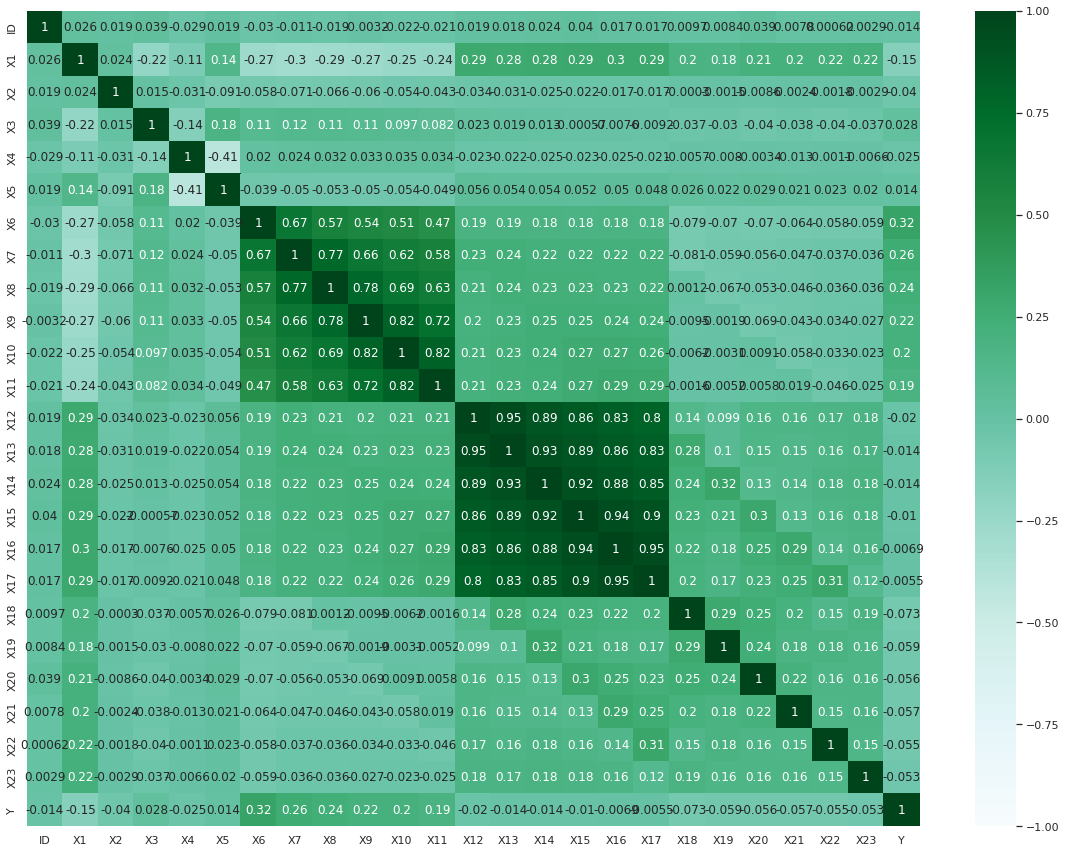

In [51]:
# Uso de matriz de correlación de Pearson para crear mapa de calor de correlación entre atributos

sns.set(rc={'figure.figsize':(20,15)})

matrix = df.corr()
ax = sns.heatmap(matrix, vmin = -1, vmax = 1, cmap="BuGn", annot= True)

plt.show()

* Se observa de la gráfica anterior que existe alta correlación entre los atributos en los rangos de X6 a X11 y de X12 a X17.
* Se observa mayor correlación entre los atributos X12 y X13 al igual que X16 y X17.
* Se observa que el rango de atributos de X6 a X11 tienen la mayor correlación con la variable "target" (Y).

In [27]:
# Se seleccionan analizar X6 y X7
ndf = df[['X6', 'X7']]
ndf.corr()

,X6,X7
X6,1.00000,0.67229
X7,0.67229,1.00000


In [28]:
df.X6.mean().round(2)

-0.02

In [29]:
df.X7.mean().round(2)

-0.13

In [30]:
Varience = np.cov([df.X6, df.X7])
Varience

array([[1.26335132, 0.90463822],
       [0.90463822, 1.43321781]])

In [31]:
ndf = df[['X6','X7']]
ndf.var().sum()

2.6965691236237816

In [32]:
t= ndf.var().sum()
varC =Varience[0][0]
varR = Varience[1][1]

In [34]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of X6 \t:', ((varC/t)*100).round(2),'%' )
print('Varience prop. of X7 \t:', ((varR/t)*100).round(2),'%' )

Total Varience 			: 2.7
Varience prop. of X6 	: 46.85 %
Varience prop. of X7 	: 53.15 %


In [35]:
ndf.corr().round(2)

,X6,X7
X6,1.00,0.67
X7,0.67,1.00


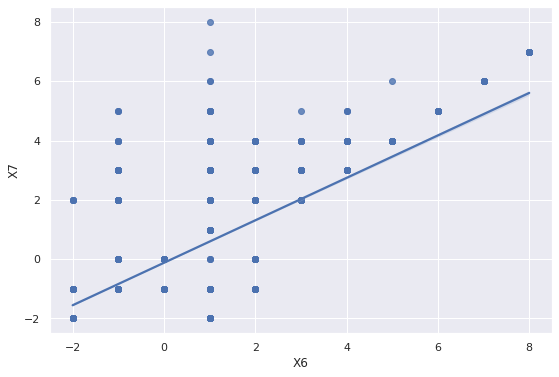

In [42]:
sns.set(rc={'figure.figsize':(9,6)})

p = sns.regplot(data = df,  
                x = df.X6, 
                y = df.X7
               ) 
p

* Se confirma la correlación positiva entre variables.

In [97]:
# Se selecciona Rango X6 a X11
df_num = df.iloc[:,6:12]
df_num.head()

,X6,X7,X8,X9,X10,X11
0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
1,-1.0,2.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,0.0,-1.0,0.0,0.0,0.0


In [104]:
# Analisis de varianzas
cols = ["X6", "X7","X8","X9","X10","X11"]

summary = {
    "Varianzas": df_num[cols].var(),
    "Valor min": df_num[cols].min(),
    "Valor max": df_num[cols].max()
}

pd.DataFrame(summary, index = cols).transpose()

,X6,X7,X8,X9,X10,X11
Varianzas,1.263351,1.433218,1.430478,1.365202,1.282118,1.320896
Valor min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
Valor max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [107]:
t = df_num.var().sum()

var_X6 = df_num.X6.var()
var_X7 = df_num.X7.var()
var_X8 = df_num.X8.var()
var_X9 = df_num.X9.var()
var_X10 = df_num.X10.var()
var_X11 = df_num.X11.var()

print('Varianza Total \t\t:',t.round(2))
print('Varianza X6 \t:', ((var_X6/t)*100).round(2),'%' )
print('Varianza X7 \t\t:', ((var_X7/t)*100).round(2),'%' )
print('Varianza X8 \t\t:', ((var_X8/t)*100).round(2),'%' )
print('Varianza X9 \t\t:', ((var_X9/t)*100).round(2),'%' )
print('Varianza X11 \t\t:', ((var_X10/t)*100).round(2),'%' )


Varianza Total 		: 8.1
Varianza X6 	: 15.61 %
Varianza X7 		: 17.7 %
Varianza X8 		: 17.67 %
Varianza X9 		: 16.86 %
Varianza X11 		: 15.84 %


* Se observa que la varianza esta distribuida de manera equitativa entra las variables analizadas. 
* Se observa que las variables analizadas se encuentran en el mismo rango.
* Se determina que no afectará el resultado de PCA y no se requiere aplicar métodos de normalización adicionales. 

In [43]:
# Analisis PCA
from sklearn.decomposition import PCA

### Análisis PCA

In [111]:
# Calculo de PCA
pcs = PCA()
pcs_t = pcs.fit_transform(df_num)
pcs_t[:5]

array([[-5.13266592e-01, -3.71785489e+00, -3.72204687e-01,
        -4.87418918e-01,  1.00304684e+00,  6.15104283e-01],
       [ 1.75433282e+00,  8.40907508e-01,  4.00463095e-01,
        -2.45141938e+00,  2.84831640e-01,  9.39961098e-01],
       [ 4.57006354e-01,  2.00409432e-01,  1.27613104e-04,
        -4.58953991e-02,  5.60163314e-03,  8.53669974e-04],
       [ 4.57006354e-01,  2.00409432e-01,  1.27613104e-04,
        -4.58953991e-02,  5.60163314e-03,  8.53669973e-04],
       [-3.19041927e-01,  9.31422382e-01,  5.95263314e-02,
        -4.75042822e-01,  7.76810292e-01,  2.85301589e-01]])

In [112]:
# Varianza explicada y acumulada por componente 

pcsSummary_df = pd.DataFrame({
    '% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
    '% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
    })

pcsSummary_df

,% varianza explicada,% varianza acumulada
0,71.89,71.888680
1,11.36,83.247481
2,6.73,89.980550
3,4.49,94.470364
4,3.31,97.780772
5,2.22,100.000000


In [113]:
# Se agregan labels de acuerdo al componente

pcs_labels = [f'PC{i + 1}' for i in range(len(df_num.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,71.89,71.888680
PC2,11.36,83.247481
PC3,6.73,89.980550
PC4,4.49,94.470364
PC5,3.31,97.780772
PC6,2.22,100.000000


In [120]:
# Verificación de varianzas entre modelos

pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)

A = df_num.var().sum()
B = pcs_df.var().sum()

print("Varianza total variables originales: ", A)
print("Varianza total de los componentes: ", B)
print("Diferencia entre varianzas: ", abs(A-B))

Varianza total variables originales:  8.095264239737904
Varianza total de los componentes:  8.09526423973791
Diferencia entre varianzas:  5.329070518200751e-15


* Se observa que se preserva la información entre los modelos.
* En el rango de atributos seleccionados de X6 a X11 se observa que los componentes PC1 y PC2 contienen el **83.25%** de la varianza explicada. 

In [118]:
# Analisis de composición entre atributos y PC
comps_df = pd.DataFrame(pcs.components_.round(4),columns = pcs_df.columns,index = df_num.columns)
comps_df.iloc[:,:2]

,PC1,PC2
X6,0.3377,0.4220
X7,-0.6110,-0.4404
X8,-0.6312,0.2601
X9,0.3010,-0.5819
X10,-0.1506,0.4579
X11,-0.0297,0.1094


In [122]:
# Análisis de valores máximos por cada componente
comps_df.iloc[:,:7].abs().idxmax()

PC1     X8
PC2     X9
PC3    X10
PC4     X9
PC5    X11
PC6     X9
dtype: object

* Se observa que los atributos X8 y X9 resultan ser los mas relevantes y que aportan más a los PC1 y PC2. 

In [123]:
# Análisis de valores mínimos por cada componente
comps_df.iloc[:,:7].abs().idxmin()

PC1    X11
PC2    X11
PC3     X7
PC4     X8
PC5     X9
PC6    X11
dtype: object

* Se observa que X11 es la variable que menos aporta a los componentes principales. 

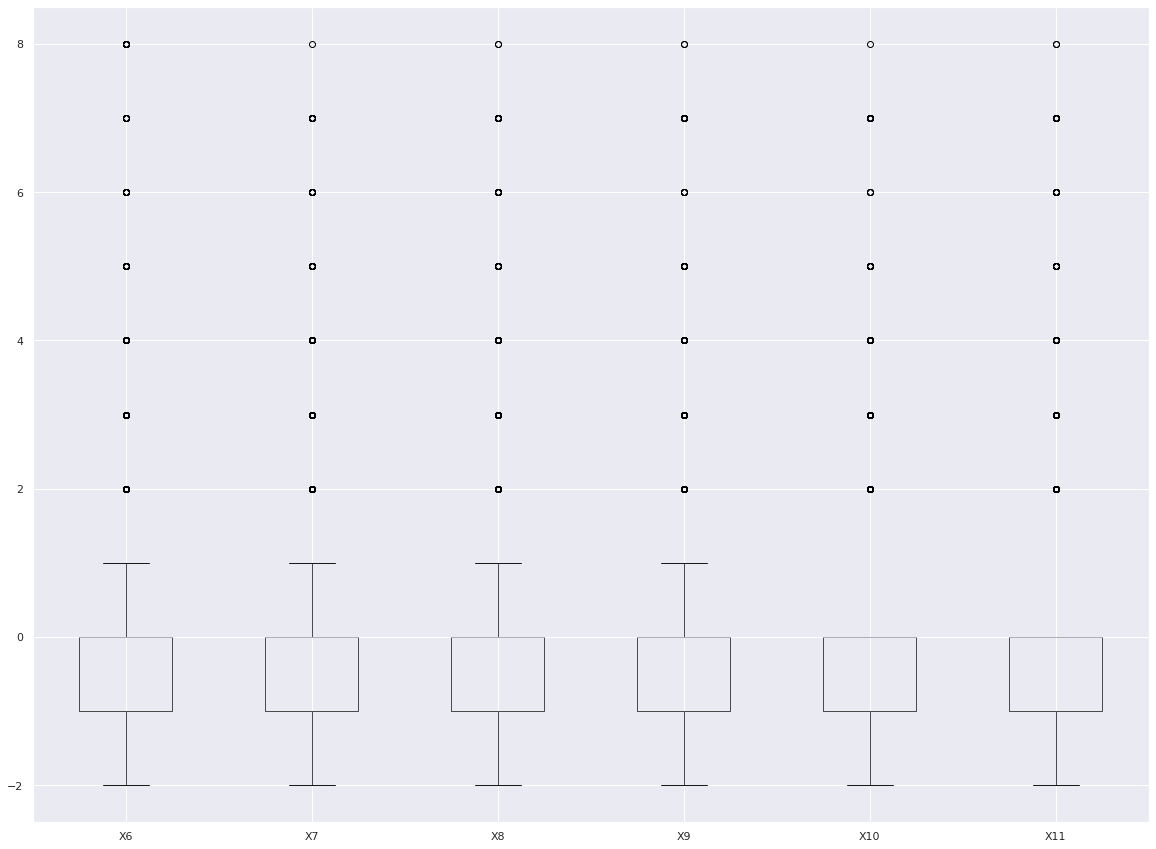

In [124]:
# Análisis de valores atípicos - Variables Originales
df_num.boxplot()

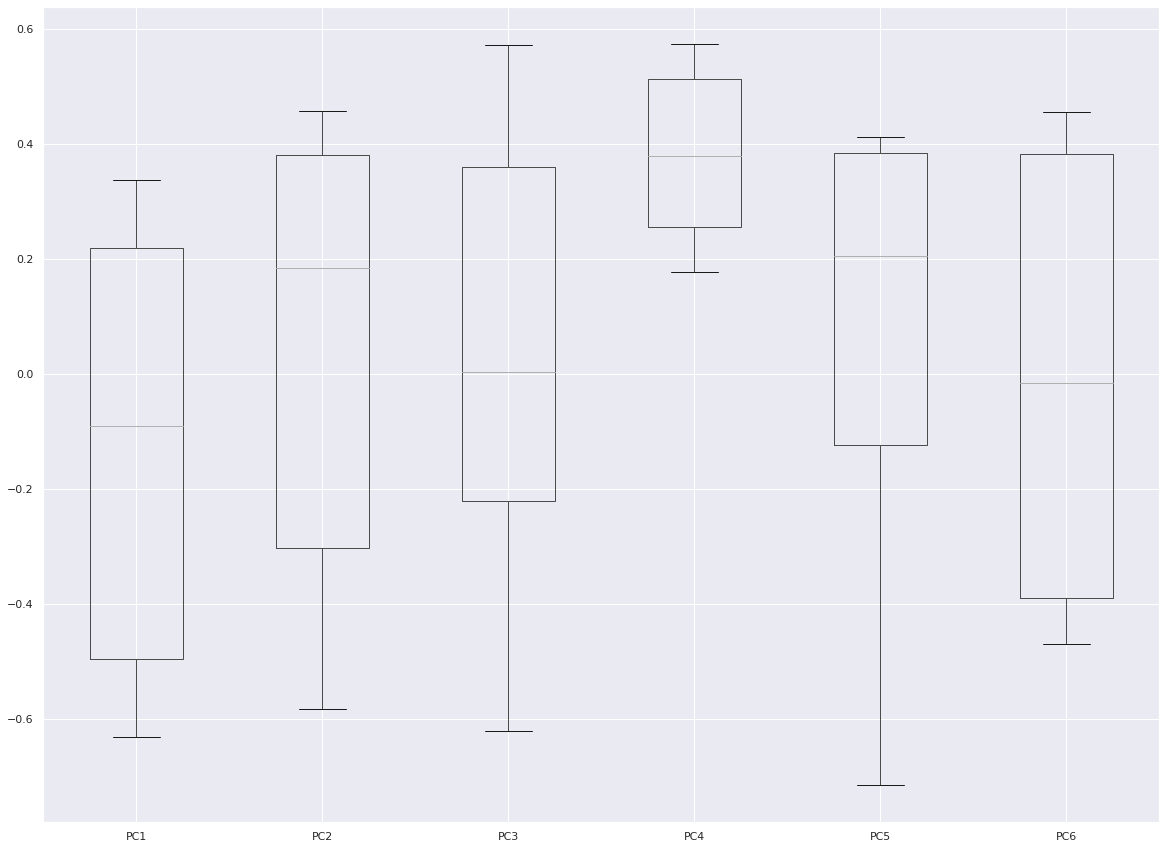

In [125]:
# Análisis de valores atípicos - Componentes Principales
comps_df.boxplot()

* Se observa que PC3 muestra valores atípicos respecto a los pesos de relación con las variables originales. 

# Parte 2: Preguntas de Análisis

1. **¿Cuál es el número de componentes mínimo y por qué?**

R// Dentro del rango analizado de atributos X6 a X11 se identifica que el número mínimo de componentes es (2) considerando que los componentes PC1 y PC2 contienen el **83.25%** de la varianza explicada

2. **¿Cuál es la variación de los datos que representan esos componentes?**

R// La variación que representan esos componentes corresponde al 83.25% del total del rango analizado. 

3. **¿Cuál es la pérdida de información después de realizar PCA?**

R// No se observa perdida de información considerando que la diferencia entre varianzas (originales vs PCA) es de **5.33e-15**.

4. **De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

R// Del rango analizado X6 a X11, se observa que las variables originales con mayor importancia son X8 y X9 considerando su mayor peso en aporte a los componentes principales PC1 y PC2. Se observa que la variable original X11 es la que menos aporta peso a los componentes principales. 

5. **¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

R// Se recomienda un PCA cuando se observe alta correlación entre atributos de la base de datos a analizar y que la cantidad de atributos en dicha base de datos sea muy grande y demande mucho recurso de procesamiento de acuerdo a los recursos con los que se cuentan. Ofrece el beneficio de optimizar el uso de los recursos disponibles para realizar modelos de aprendizaje automático de manera más eficiente en tiempo sin perder la escencia de la información y los aportes a los insights de su análisis. 